In [14]:
""" Usage of: cv2.IMWRITE_JPEG_QUALITY parameter value
    Author: Peter Mankowski"""

import cv2
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [15]:
def print_file_size(file):
    File_Size = os.path.getsize(file)
    File_Size_MB = round(File_Size/1024/1024,2)
    print("Image File Size is " + str(File_Size_MB) + "MB" )

In [16]:
#read image
path = 'C:/Users/seeho/CamPics'
img = cv2.imread('C:/Users/seeho/CamPics/amazontoronto.jpg', 1)
print("Image Saved Successfully!!")
cv2.imwrite(os.path.join(path , 'amazontoronto2.jpg'), img)

Image Saved Successfully!!


True

In [17]:
# cv2.destroyAllWindows() simply destroys all the windows I created.
d = cv2.destroyAllWindows()

In [18]:
cv2.imwrite(os.path.join(path , 'amazontoronto2.tiff'), img)
print("Image Saved Successfully!!")
print_file_size("C:/Users/seeho/CamPics/amazontoronto2.tiff")

Image Saved Successfully!!
Image File Size is 1.37MB


In [20]:
"""Let's save the same image in JPEG format by explicitly mentioning the cv2.IMWRITE_JPEG_QUALITY parameter value"""
"""lowest"""
quality=0 

cv2.imwrite(os.path.join(path , 'amazontoronto3.jpg'), img, [int(cv2.IMWRITE_JPEG_QUALITY), quality])
print("Image Saved Successfully!!")
print_file_size("C:/Users/seeho/CamPics/amazontoronto3.jpg")

Image Saved Successfully!!
Image File Size is 0.02MB


In [21]:
"""marginally better"""
quality=10
cv2.imwrite(os.path.join(path , 'amazontoronto4.jpg'), img, [cv2.IMWRITE_JPEG_QUALITY, quality])
print("Image Saved Successfully!!")
print_file_size("C:/Users/seeho/CamPics/amazontoronto4.jpg")

Image Saved Successfully!!
Image File Size is 0.04MB


In [52]:
t_lower = 99 # Lower Threshold
t_upper = 101 # Upper threshold
aperture_size = 3 # Aperture size
L2Gradient = True # Boolean
  
edge = cv2.Canny(img, t_lower, t_upper,
                 apertureSize = aperture_size, 
                 L2gradient = L2Gradient ) 
  
cv2.imwrite(os.path.join(path , 'amazontoronto5.jpg'), edge)
print("Image Saved Successfully!!")
print_file_size("C:/Users/seeho/CamPics/amazontoronto5.jpg")

Image Saved Successfully!!
Image File Size is 0.55MB


In [53]:
try:
    from PIL import Image
except ImportError:
    import Image

background = Image.open("C:/Users/seeho/CamPics/amazontoronto5.jpg")
overlay = Image.open("C:/Users/seeho/CamPics/amazontoronto3.jpg")

background = background.convert("RGBA")
overlay = overlay.convert("RGBA")

new_img = Image.blend(background, overlay, 0.5)
new_img.save("C:/Users/seeho/CamPics/blend.png", "PNG")

# Loading .png image
png_img = cv2.imread('C:/Users/seeho/CamPics/blend.png')
  
# converting to jpg file
#saving the jpg file
cv2.imwrite('C:/Users/seeho/CamPics/blend_img.jpg', png_img, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

True

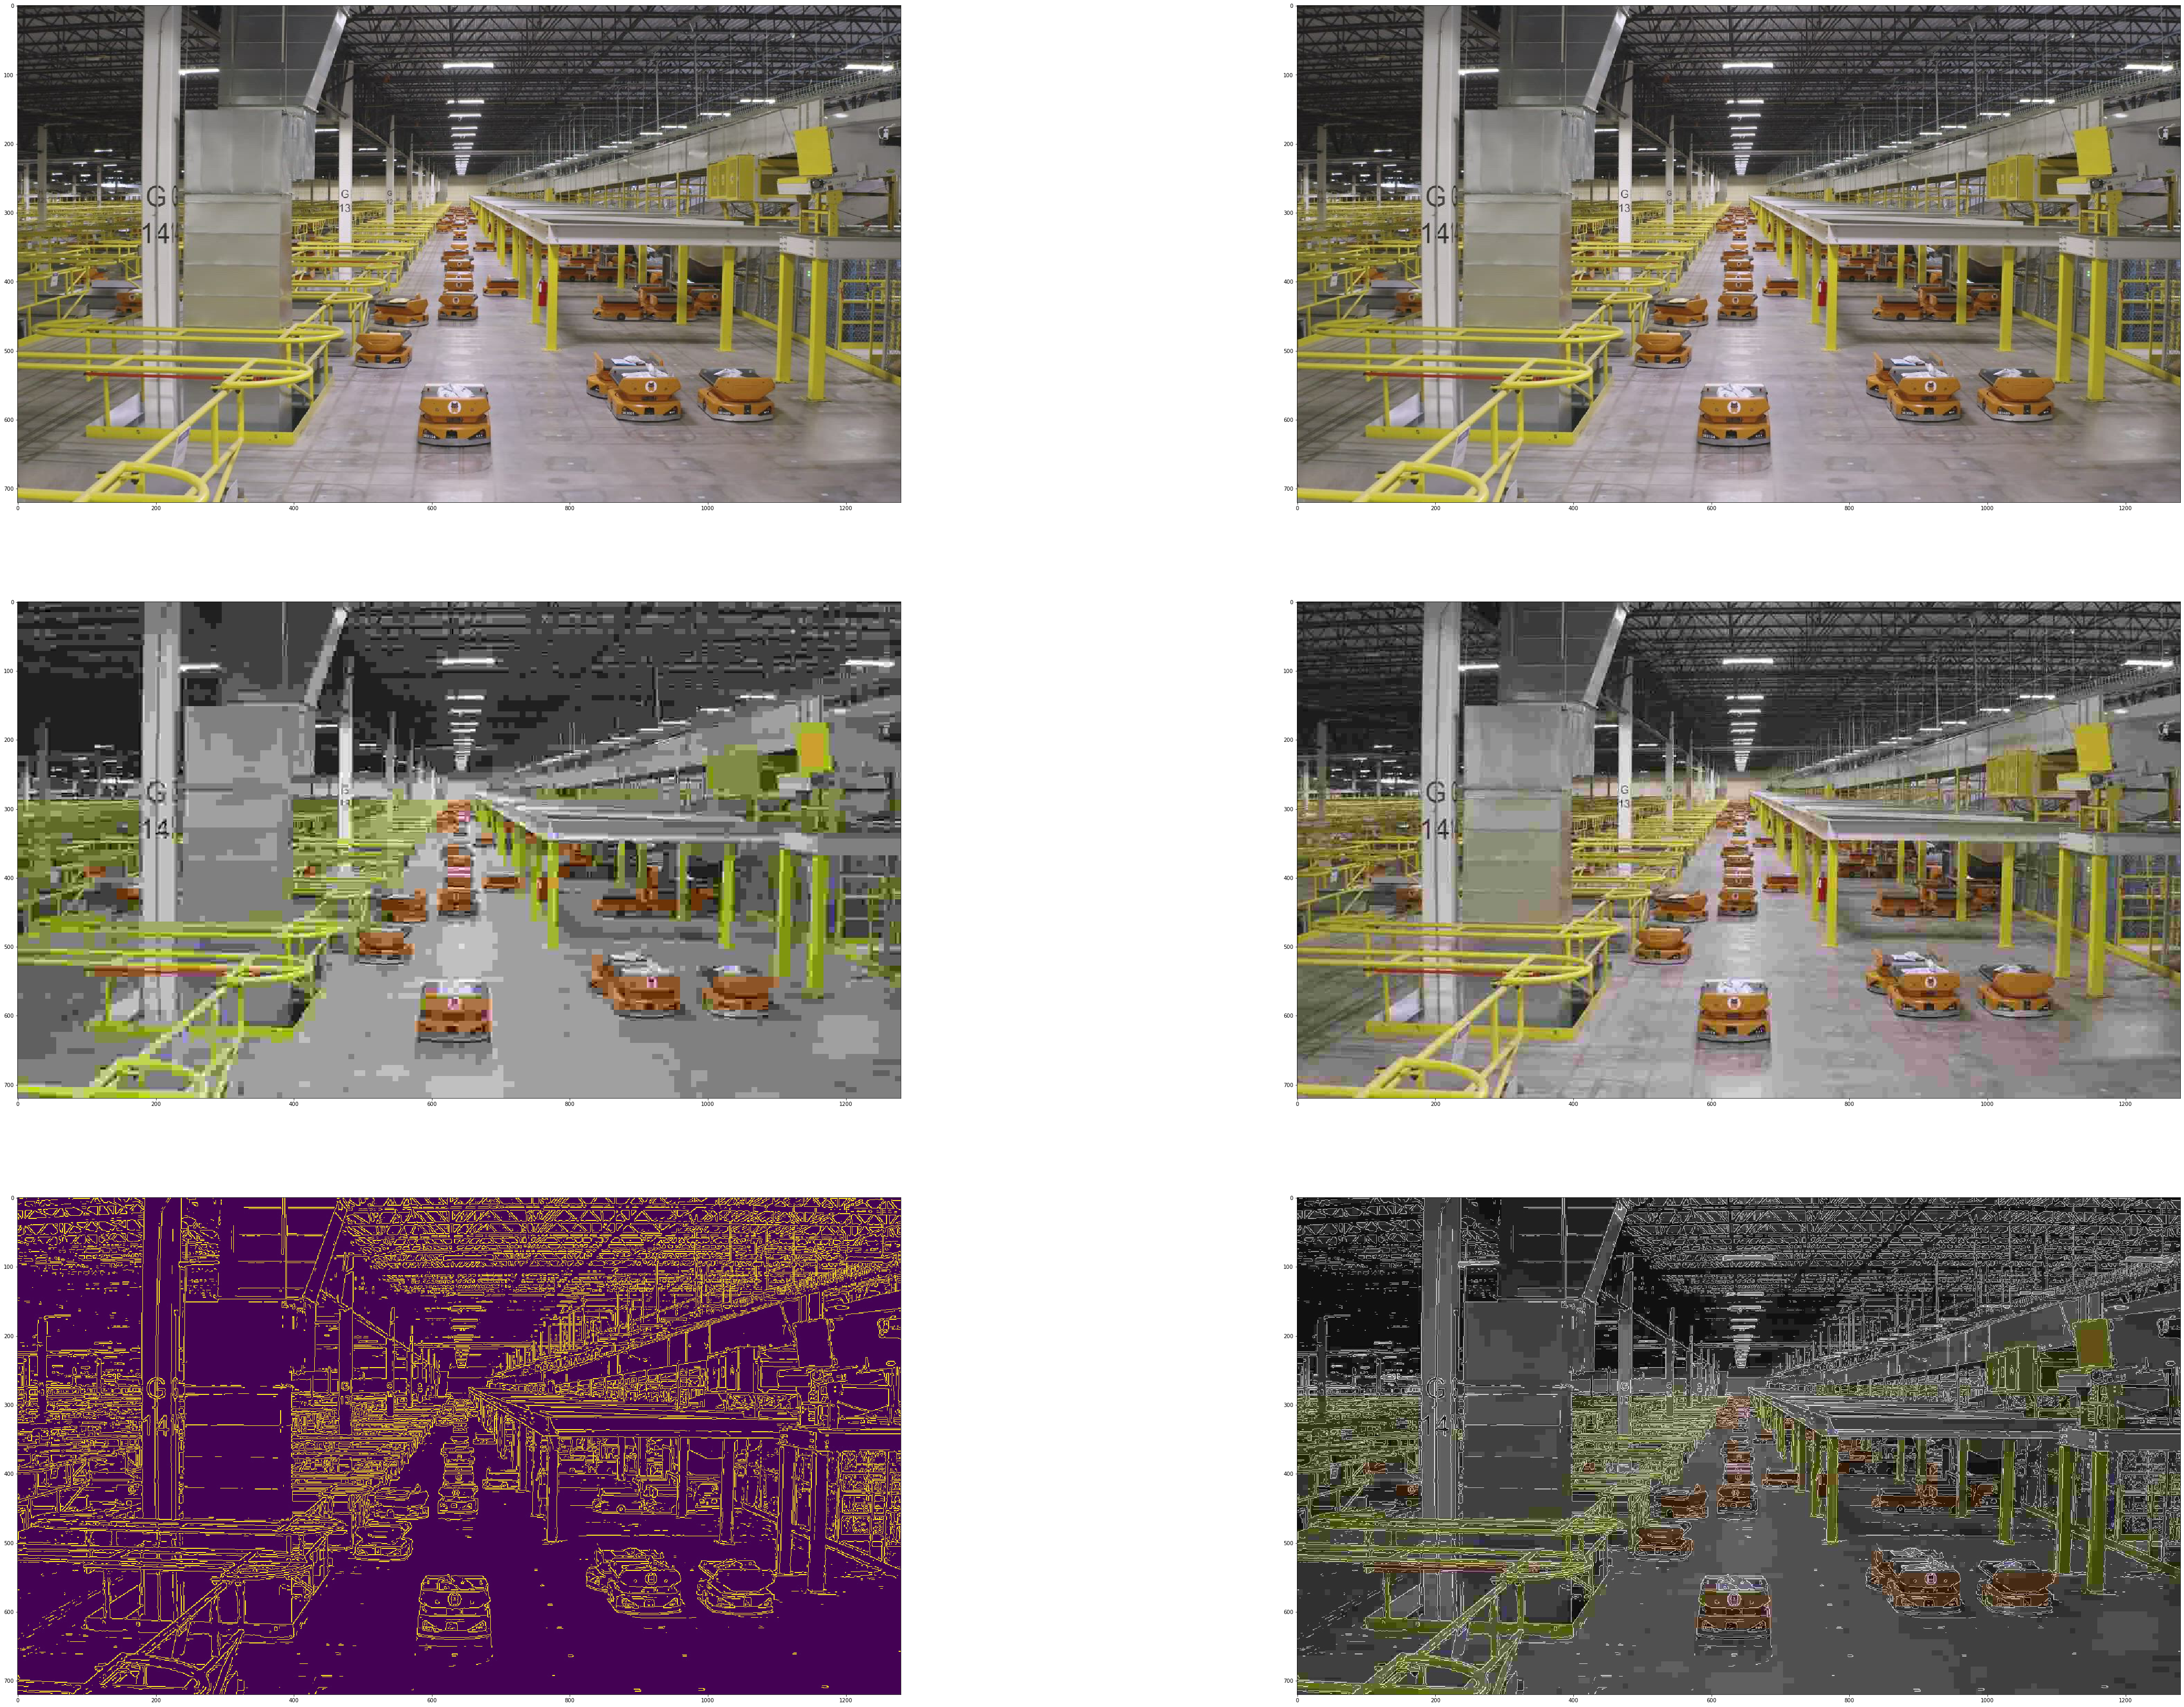

In [54]:
"""Display all images in one cell"""
images = []
for img_path in glob.glob('C:/Users/seeho/CamPics/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(80,80))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)